<a href="https://colab.research.google.com/github/pbtank/Thruster-Design/blob/5g%2FsMethane/Constrained_mdotf_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example Design Case


**(Constrained $CH_4$ flowrate)** final
---

**Design Requirements:**

- Water Cooled
- Gaseous $O_2$ and gaseous $CH_4$
- Chamber Pressure $P_c$ = 10 bar
- $\dot{m}_c$ for $CH_4$ = 5 g/s
- Atmospheric pressure $P_a$ = 1.01325 bar

In [ ]:
Pc = 10e5
mdotc = 5/1000
Pa = 1.01325e5


################ CONSTANTS ################
g = 9.81
Ru = 8.314e3
pi = 3.141592

---
**Step 1:**

- We take optimum O/F ratio $r$ = 3 (PARTHA)

- Ideal Sp. Impulse $I_{sp}$ = 222 s (YASH)

- Total Propellant Flow Rate $\dot{m}$:

$$\dot{m} = (r+1)\dot{m}_c$$

- $O_2$ Flow Rate:

$$\dot{m}_o = \frac{r}{r+1}\dot{m}$$

- Thrust:

$$F = \dot{m}I_{sp}g$$

In [ ]:
r = 3
Isp = 222

mdot = (r+1)*mdotc
print("mdot : {0} kg/s".format(mdot))

mdoto = r/(r+1) * mdot
F = mdot*Isp*g

print("mdoto : {0} kg/s".format(mdoto))
print("F : {0} N".format(F))

mdot : 0.02 kg/s
mdoto : 0.015 kg/s
F : 43.556400000000004 N


---
**Step 2:**

- Chamber gas temperature $T_c$ = 3431.90 K (YASH|CEA)

- Throat gas temp $T_t$ = 3279.57 K (YASH|CEA)

- $\gamma$ for gases:

$$\gamma = \frac{C_p}{C_p - \frac{Ru}{M}}$$

- $C_p$ = 2.4061 kJ/kgK, $M$ = 19.401 g/mole

In [ ]:
Tc = 3431.90
Tt = 3279.57

cp = 2.4061e3
M = 19.401
R = Ru/M
gamma = (cp)/(cp - (R))
print("gamma : {0}".format(gamma))
print("R : {0} J/kgK".format(R))


gamma : 1.216698074377488
R : 428.53461161795786 J/kgK


---
**Step 3:**

- Throat pressure $P_t$:

$$P_t = P_c \left(1 + \frac{\gamma-1}{2}\right)^{-\frac{\gamma}{\gamma-1}}$$

- From CEA results, $P_t$ = 5.7959 bar

In [ ]:
Pt = Pc * (1 + (gamma-1)/2)**(-gamma/(gamma-1))
# pt = 5.7959e5
print("pt : {0} bar".format(Pt/1e5))

pt : 5.6124680769902575 bar


---
**Step 4:**

- Nozzle throat area $A_t$:
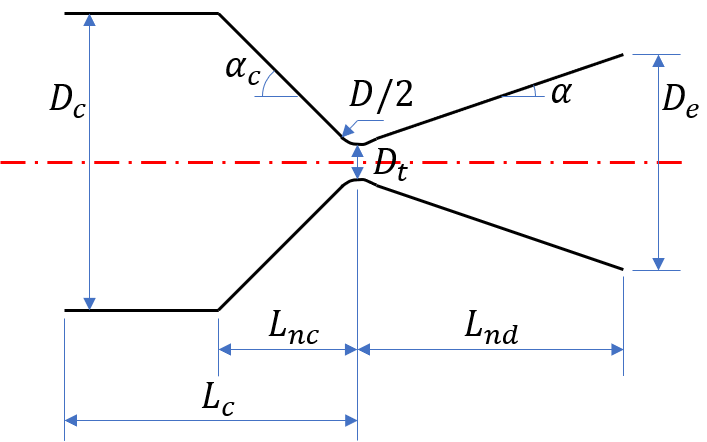
$$A_t = \frac{\dot{m}}{P_t} \sqrt{\frac{RT_t}{\gamma}}$$

In [ ]:
At = (mdot/Pt) * (R*Tt/(gamma))**0.5
print("At : {0} mm^2".format(At*1000**2))

At : 38.29888286447033 mm^2


---
**Step 5:**

- Nozzle throat diameter $D_t$:

$$D_t = \sqrt{\frac{4}{\pi} A_t}$$

In [ ]:
Dt = round((4*At/pi)**0.5, 3)
print("Dt : {0} mm".format(Dt*1000))

Dt : 7.0 mm


---
**Step 6:**

- Nozzle exit Mach number $M_e$:

$$M_e = \sqrt{\frac{2}{\gamma-1} \left[\left(\frac{P_c}{P_a}\right)^\frac{\gamma-1}{\gamma}-1\right]}$$

- Nozzle exit area $A_e$:

$$A_e = \frac{A_t}{M_e} \left[\frac{1+\frac{\gamma-1}{2}M_e^2}{\frac{\gamma+1}{2}}\right]^\frac{\gamma+1}{2(\gamma-1)}$$

In [ ]:
Me = (2/(gamma-1) * ((Pc/Pa)**((gamma-1)/gamma) - 1))**0.5
print("Me : {0}".format(Me))

a = 1 + (gamma-1)*0.5*Me**2
b = (gamma+1)/2
c = (gamma+1)/(2*(gamma-1))

AeAt = (1/Me) * (a/b)**c

print("Ae/At : {0}".format(AeAt))

Ae = AeAt * At

print("Ae : {0} mm^2".format(Ae*1000**2))

Me : 2.155559804427881
Ae/At : 2.206342032796651
Ae : 84.5004350730363 mm^2


---
**Step 7:**

- Nozzle exit diameter $D_e$:

$$D_e = \sqrt{\frac{4}{\pi} A_e}$$

In [ ]:
De = (4*Ae/pi)**0.5
print("De : {0} mm".format(De*1000))

De : 10.372527072302 mm


---
**Step 8:**

- Combustion Chamber $L^*$ = 3.7 m (PRIYANSU)
(https://louis.uah.edu/cgi/viewcontent.cgi?article=1411&context=uah-theses)

- Combustion Volume $V_c$:
$$V_c = L^*A_t$$

In [ ]:
Lstar = 3.7
Vc = Lstar*At
print("Vc : {0} mm^3".format(Vc*1000**3))

Vc : 141705.86659854025 mm^3


---
**Step 9:**

- Chamber volume: $V_c = A_cL_c + $ convergent volume

- For small combustion chambers convergent volume = 0.1 $\times$ cylindrical chamber

$$V_c = 1.1(A_cL_c)$$

- Let $D_c = 5D_t$


In [ ]:
Dc = 5*Dt
Ac = 25*At
Lc = Vc/(1.1*Ac)

print("Dc : {0} mm".format(Dc*1000))
print("Ac : {0} mm^2".format(Ac*1000**2))
print("Lc : {0} mm".format(Lc*1000))

Dc : 35.0 mm
Ac : 957.4720716117583 mm^2
Lc : 134.54545454545456 mm


---
**Step 10:**
![link text](https://drive.google.com/uc?export=view&id=1jyuCxMKGvXinH--fC7B0e3M15A_pycWv)



- Let for covergent section $\alpha_c = 45 \degree$

- Let for divergent section $\alpha = 15 \degree$

- Diverging section length:
$$L_{nd} = \frac{(D_e - D_t) + D(sec\alpha - 1)}{2tan\alpha}$$

- Converging section length:
$$L_{nc} = \frac{(D_c - D_t) + D(sec\alpha_c - 1)}{2tan\alpha_c}$$

- Throat fillet diameter $D = 1.5 D_t$

In [ ]:
import math

alpha = 15
alphac = 45

dtor = pi/180

D = 1.5*Dt
Lnd = ((De-Dt) + D*(math.cos(alpha*dtor)**-1 - 1)) / (2*math.tan(alpha*dtor))
Lnc = ((Dc-Dt) + D*(math.cos(alphac*dtor)**-1 - 1)) / (2*math.tan(alphac*dtor))

print("Lnc : {0} mm".format(Lnc*1000))
print("Lnd : {0} mm".format(Lnd*1000))

Lnc : 16.17462527507902 mm
Lnd : 6.984398029811282 mm


In [ ]:
print(
    "############### FINAL PARAMETERS ###############",
    f"{'Parameter':<10}{'|'}{'Dimension':>15}{'|'}{'':>5}{'|'}",
    f"{'==========':<10}{'='}{'===============':>15}{'='}{'=====':>5}{'='}",
    f"{'Dc':<10}{'|'}{Dc*1000:>15.4f}{'|'}{'mm':>5}{'|'}",
    f"{'Lc':<10}{'|'}{Lc*1000:>15.4f}{'|'}{'mm':>5}{'|'}",
    f"{'Lnc':<10}{'|'}{Lnc*1000:>15.4f}{'|'}{'mm':>5}{'|'}",
    f"{'ALPHAc':<10}{'|'}{alphac:>15}{'|'}{'deg':>5}{'|'}",
    f"{'Dt':<10}{'|'}{Dt*1000:>15.4f}{'|'}{'mm':>5}{'|'}",
    f"{'D':<10}{'|'}{D*1000:>15.4f}{'|'}{'mm':>5}{'|'}",
    f"{'De':<10}{'|'}{De*1000:>15.4f}{'|'}{'mm':>5}{'|'}",
    f"{'Lnd':<10}{'|'}{Lnd*1000:>15.4f}{'|'}{'mm':>5}{'|'}",
    f"{'ALPHA':<10}{'|'}{alpha:>15}{'|'}{'deg':>5}{'|'}",
    sep="\n"
)

############### FINAL PARAMETERS ###############
Parameter |      Dimension|     |
Dc        |        35.0000|   mm|
Lc        |       134.5455|   mm|
Lnc       |        16.1746|   mm|
ALPHAc    |             45|  deg|
Dt        |         7.0000|   mm|
D         |        10.5000|   mm|
De        |        10.3725|   mm|
Lnd       |         6.9844|   mm|
ALPHA     |             15|  deg|


---
**Step 11:**

- Bart's equation for heat transfer coefficient:
$$h = \frac{0.026}{D_t^{0.2}} \left(\frac{\mu^{0.2}C_p}{Pr^{0.6}}\right) \left(\frac{P_c}{c^*}\right)^{0.8} \left(\frac{A_t}{A}\right)^{0.9} \left(\frac{D_t}{R}\right)^{0.1} \sigma $$

- Temperature corrective factor:
$$\sigma = \frac{1}{\left[\frac{1}{2} \left(\frac{T_w}{T_o}\right) \left(1 + \frac{\gamma-1}{2}M^2\right) + \frac{1}{2}\right]^{0.8-m/5} \left[1 + \frac{\gamma-1}{2}M^2\right]^{m/5}}$$

- $\mu$ is viscosity, Pr is Prandtl number, $c^*$ is characteristic velocity, A is sectional area.

- m is exponent of viscosity dependence on temperature, $T_w$ is wall temperature, $T_o$ is adiabatic flame temperature, M is Mach number at section, $\gamma$ is at chamber conditions

- All values are computed at chamber conditions.

- m = 0.6

- Characteristic velocity $c^*$ = 1928.8 m/s (YASH|CEA)

- Viscosity $\mu$ = 0.00010736 kg/ms (YASH|CEA)

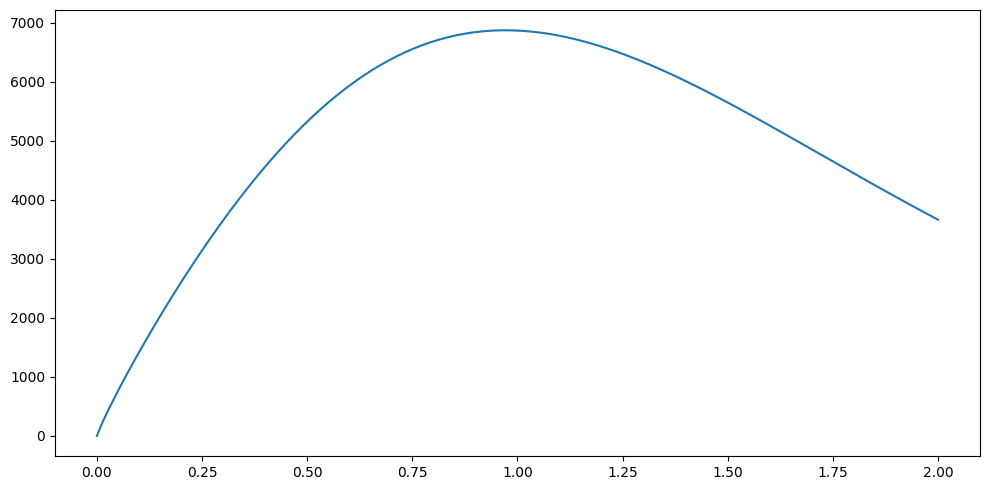

In [ ]:
###################### test of bartz's relation in british units
import numpy as np
from matplotlib import pyplot as plt

PasTolnpins = 0.05599741
fpsToWpm2K = 20428.077*144
def h(Mx):
    m = 0.6
    aa = 1 + (gamma-1)*0.5*Mx**2
    To = 6300 # R from 3500K
    Tw = 1350 # R from 750K
    sigma = 1/((0.5*(Tw/To)*(aa) + 0.5)**(0.8-m/5) * (aa)**(m/5))

    cstar = 6328.083 # ft/s from m/s
    mu = 0.00010736 * PasTolnpins # lb/ins
    cp = 0.5747 # Btu/lbR from 2.4061 kJ/kgK
    Pr = 4*gamma/(9*gamma-5)
    pc = 145.038 # psia from bar
    g = 32.2 # ft/s2
    R = 0.2066929 # in from mm
    Dt = 0.275591 # in from mm

    ata = Mx/(((2 + (gamma-1)*Mx**2)/(gamma+1))**((gamma+1)/(gamma-1)))**0.5
    h = (0.026/Dt**0.2) * (mu**0.2 * cp / Pr**0.6) * (pc*g/cstar)**0.8 * (ata)**0.9 * (Dt*2/R)**0.1 * sigma
    return h * fpsToWpm2K

x = np.linspace(0, 2, 200)
plt.plot(x, h(x))
plt.show()


---
**Step 12:**

- Function to give contour profile $D(x)$

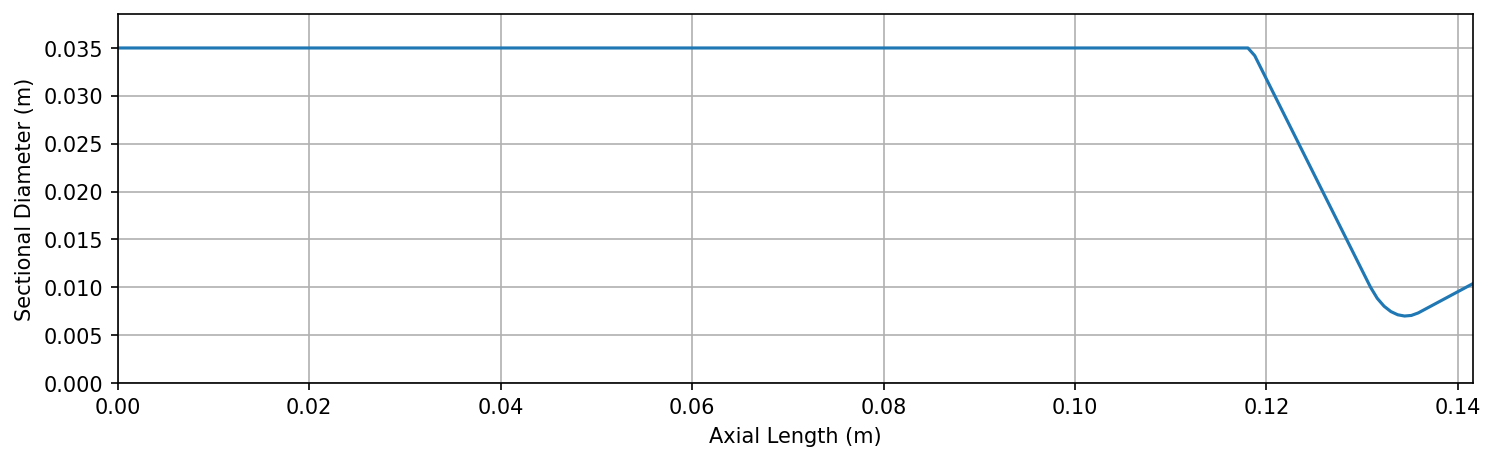

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math

def contour(x, Lc, Lnc, Lnd, alpha, alphac, Dc, D, Dt, De):

    Ltc = D*0.5*math.sin(alphac*dtor)
    Ltn = D*0.5*math.sin(alpha*dtor)
    if 0 <= x < Lc - Lnc:
        return Dc
    elif Lc-Lnc <= x < Lc-Ltc:
        Dtc = Dt+D*(1-math.cos(alphac*dtor))
        Dx = ((Dc-Dtc)/(Ltc-Lnc))*(x-Lc+Ltc) + (Dtc)
        return Dx
    elif Lc-Ltc <= x < Lc+Ltn:
        xp = x-Lc
        Dx = Dt + D - 2*(D**2 * 0.25 - xp**2)**0.5
        return Dx
    elif Lc+Ltn <= x <= Lc+Lnd:
        Dtn = Dt+D*(1-math.cos(alpha*dtor))
        Dx = ((Dtn-De)/(Ltn-Lnd))*(x-Lc-Lnd) + De
        return Dx
    else:
        print("given x is out of range")

x = np.linspace(0, Lc+Lnd, 200)
y = np.zeros(200)
for i in range(0, x.shape[0]):
    y[i] = contour(x[i], Lc, Lnc, Lnd, alpha, alphac, Dc, D, Dt, De)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.ylim(0, Dc*1.1)
plt.xlim(0, x[-1])
plt.xlabel('Axial Length (m)')
plt.ylabel('Sectional Diameter (m)')
plt.gca().set_aspect('equal')
plt.gcf().set_dpi(150)
plt.grid()
plt.show()

#################### cvs file for point x,y
# f = open("points.csv", "w")
# for i in range(0, x.shape[0]):
#     f.write(str(x[i]) + "," + str(y[i]) + "\n")
# f.close()

---
**Step 13:**

- Area ratio related to sectional Mach number:

$$ \frac{A_x}{A_t} = \frac{1}{M_x} \sqrt{\left(\frac{1 + \frac{\gamma-1}{2} M_x^2}{\frac{\gamma+1}{2}}\right)^\frac{\gamma+1}{\gamma-1}} $$

- A numerical scheme to get $M_x$ for given $\frac{A_x}{A_t}$ where $\epsilon$ is error allowed and $\delta$ is step fraction

In [ ]:
epsilon = 0.0001
delta = 0.001

def AxAt(Mx):
    a = 1 + (gamma-1)*0.5*Mx**2
    b = (gamma+1)/2
    return np.sqrt((a/b)**((gamma+1)/(gamma-1)))/Mx

def Mx(AxAtx, Mx0):
    AxAt0 = AxAt(Mx0)
    while (AxAt0 - AxAtx) >= epsilon:
        AxAt0 = AxAt(Mx0)
        if Mx0 > 1:
            Mx0 = Mx0 - (AxAt0 - AxAtx)*delta
        else:
            Mx0 = Mx0 + (AxAt0 - AxAtx)*delta
    return Mx0

# x = np.linspace(1, 5, 200)
# y = np.zeros(200)
# for i in range(0, x.shape[0]):
#     y[i] = Mx(x[i], 6)
# plt.plot(x, y)

# x = np.linspace(1, 5, 200)
# y = np.zeros(200)
# for i in range(0, x.shape[0]):
#     y[i] = Mx(x[i], 0.05)
# # plt.plot(x-AxAt(y))       # Error
# plt.plot(x, y)
# plt.show()


---
**Step 14:**

- Implementation of Bartz's correlation based on given $Ma$:
$$h = \frac{0.026}{D_t^{0.2}} \left(\frac{\mu^{0.2}C_p}{Pr^{0.6}}\right) \left(\frac{P_c}{c^*}\right)^{0.8} \left(\frac{A_t}{A}\right)^{0.9} \left(\frac{D_t}{R}\right)^{0.1} \sigma $$

- Temperature corrective factor:
$$\sigma = \frac{1}{\left[\frac{1}{2} \left(\frac{T_w}{T_o}\right) \left(1 + \frac{\gamma-1}{2}M^2\right) + \frac{1}{2}\right]^{0.8-m/5} \left[1 + \frac{\gamma-1}{2}M^2\right]^{m/5}}$$




---
**Step 15:**

- For given $x$, finding $D(x)$, $Ma(x)$ and $h(x)$:

In [ ]:
x = np.linspace(Lc-Lnc, Lc+Lnd, 500)
y = np.zeros(500)
M = np.zeros(500)
hx = np.zeros(500)
for i in range(0, x.shape[0]):
    y[i] = contour(x[i], Lc, Lnc, Lnd, alpha, alphac, Dc, D, Dt, De)
    if x[i]<= Lc:
        M[i] = Mx((y[i]/Dt)**2, 0.01)
    else:
        M[i] = Mx((y[i]/Dt)**2, 6)
    hx[i] = h(M[i])

(0.11837082927037554, 0.14152985257526585)

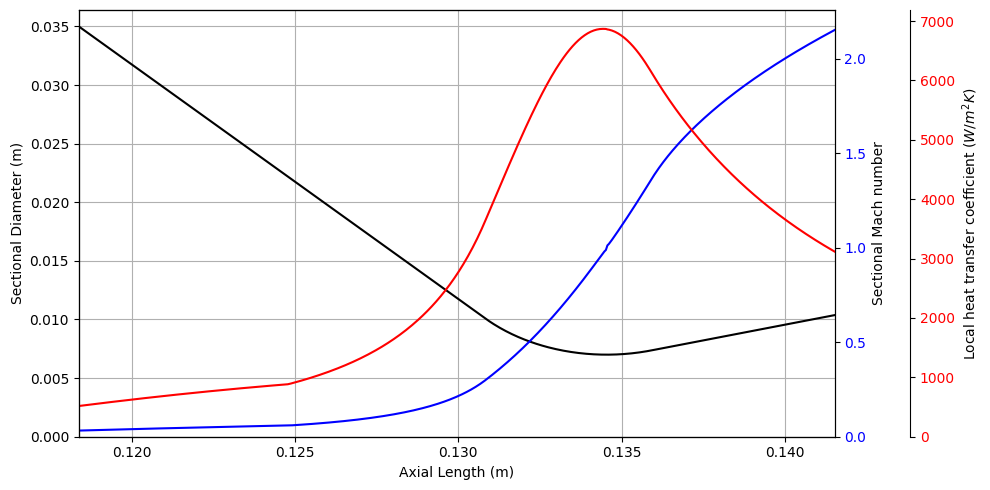

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 100
fig, ax1 = plt.subplots()
plt.grid()

ax1.plot(x, y, color='black')
ax1.set_xlabel('Axial Length (m)')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylabel('Sectional Diameter (m)')
ax1.set_ylim(bottom=0)
ax1.set_xlim(left=Lc-Lnc, right=Lc+Lnd)

ax2 = ax1.twinx()
ax2.plot(x, M, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel('Sectional Mach number')
ax2.set_ylim(bottom=0)
ax2.set_xlim(left=Lc-Lnc, right=Lc+Lnd)

ax3 = ax1.twinx()
ax3.spines.right.set_position(("axes", 1.1))
ax3.plot(x, hx, color='red')
ax3.tick_params(axis='y', labelcolor='red')
ax3.set_ylabel('Local heat transfer coefficient ($W/m^2K$)')
ax3.set_ylim(bottom=0)
ax3.set_xlim(left=Lc-Lnc, right=Lc+Lnd)